# CHL7001 - Final Project
## Transfer Learning and Computer Vision: YOLOv3 Drone-Airplane Discriminator

In [6]:
#!pip install cython
#!pip install pycocotools

  Using cached https://files.pythonhosted.org/packages/96/84/9a07b1095fd8555ba3f3d519517c8743c2554a245f9476e5e39869f948d2/pycocotools-2.0.0.tar.gz
  Stored in directory: /Users/melchior/Library/Caches/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec3da6bd62e55
Successfully built pycocotools


In [13]:
import time
import glob
import torch
import os


from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.2.0 CPU


In [ ]:
!git clone https://github.com/ultralytics/yolov3

In [ ]:
# This will download pjreddie's YOLOv3 weights
!python3 detect.py
Image(filename='data/samples/zidane.jpg', width=600)

### Training from Scratch

In [ ]:
!python3 train.py --batch-size 4 --accumulate 1 --data data/coco_16img.data && mv results.txt results0_16img.txt

In [3]:
from pycocotools.coco import COCO

ModuleNotFoundError: No module named 'pycocotools'

In [ ]:
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image(filename='results.png', width=800)

### Evaluating Trained Model

In [2]:
!python3 test.py --data data/coco.data --save-json --img-size 416

Namespace(batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/coco.data', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=True, weights='weights/yolov3-spp.weights')
Using CPU

../coco/5k.txt
[]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 313/313 [1:12:58<00:00, 10.51s/it]
                           all     5e+03  3.58e+04     0.107     0.749     0.557     0.182
                        person     5e+03  1.09e+04     0.138     0.846     0.723     0.238
                       bicycle     5e+03       316    0.0663     0.696     0.474     0.121
                           car     5e+03  1.67e+03    0.0682     0.781     0.586     0.125
                    motorcycle     5e+03       391     0.149     0.785     0.657      0.25
                      airplane     5e+03       131      0.17     0.931     0.853     0.287
                           bus     5e+03       261     0.177     0.824     0.778     0.292
         

### Transfer Learning with 2 Classes

In [43]:
!python3 train.py --cfg cfg/plane-drone.cfg --epochs 5 --data data/plane_drone_val_small.data --num-workers 4 && mv results.txt results_plane_drone_img.txt



Namespace(accumulate=2, batch_size=32, bucket='', cache_images=False, cfg='cfg/plane-drone.cfg', data='data/plane_drone_val_small.data', epochs=5, evolve=False, img_size=416, img_weights=False, multi_scale=False, nosave=False, notest=False, num_workers=4, rect=False, resume=False, transfer=False, xywh=False)
Using CPU

data/plane_drone_train_small.txt
[]
Model Summary: 222 layers, 6.15291e+07 parameters, 6.15291e+07 gradients

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       0/4        0G      1.66         0      16.7      34.3      52.6        34       416: 100%|█| 4/4 [11:35<00:00, 169.39s/it]
data/plane_drone_val_small.txt
[]
Reading image shapes: 100%|█████████████████| 191/191 [00:00<00:00, 1223.97it/s]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 6/6 [03:16<00:00, 34.57s/it]
                           all       191       259  5.61e-05   0.00301  5.09e-07   0.00011

     Epoch  

In [45]:
!python3 test.py --data data/plane_drone_val_small.data --cfg cfg/plane-drone.cfg  --weights weights/last.pt --save-json --img-size 416



Namespace(batch_size=16, cfg='cfg/plane-drone.cfg', conf_thres=0.001, data='data/plane_drone_val_small.data', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=True, weights='weights/last.pt')
Using CPU

data/plane_drone_val_small.txt
[]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 12/12 [02:05<00:00, 12.83s/it]
                           all       191       259         0         0         0         0
                         drone       191        93         0         0         0         0
                      airplane       191       166         0         0         0         0


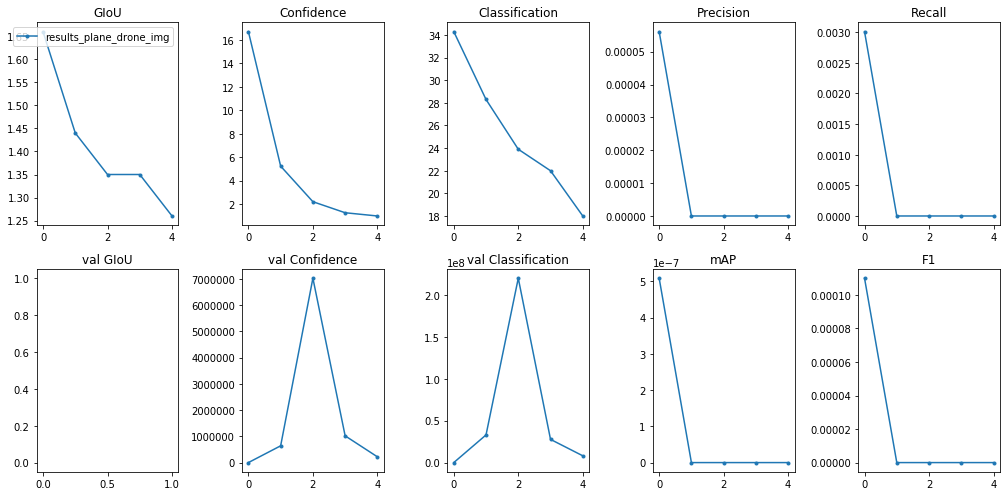

In [46]:
from utils import utils; utils.plot_results()

In [38]:
!python3 train.py --data data/coco_1cls.data --epochs 3 --cfg cfg/yolov3-spp.cfg --batch-size 1 --accumulate 1 --nosave && mv results.txt results_1cls.txt


Namespace(accumulate=1, batch_size=1, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/coco_1cls.data', epochs=3, evolve=False, img_size=416, img_weights=False, multi_scale=False, nosave=True, notest=False, num_workers=8, rect=False, resume=False, transfer=False, xywh=False)
Using CPU

data/coco_1cls.txt
[]
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       0/2        0G         0         0     0.682         0     0.682         0       416: 100%|█| 5/5 [00:21<00:00,  4.33s/it]

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       1/2        0G         0         0     0.568         0     0.568         0       416: 100%|█| 5/5 [00:21<00:00,  4.28s/it]

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       2/2        0G         0         0      0.43         0     

In [39]:
!python3 train.py --data data/coco_1cls.data --epochs 3 --cfg cfg/yolov3-spp-1cls.cfg --batch-size 1 --accumulate 1 --nosave && mv results.txt results_1clscfg.txt


Namespace(accumulate=1, batch_size=1, bucket='', cache_images=False, cfg='cfg/yolov3-spp-1cls.cfg', data='data/coco_1cls.data', epochs=3, evolve=False, img_size=416, img_weights=False, multi_scale=False, nosave=True, notest=False, num_workers=8, rect=False, resume=False, transfer=False, xywh=False)
Using CPU

data/coco_1cls.txt
[]
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       0/2        0G         0         0     0.688         0     0.688         0       416: 100%|█| 5/5 [00:20<00:00,  4.18s/it]

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       1/2        0G         0         0     0.565         0     0.565         0       416: 100%|█| 5/5 [00:20<00:00,  4.19s/it]

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       2/2        0G         0         0      0.42         0

In [42]:
!python3 -c "from utils import utils; utils.plot_results()"